In [547]:
pip install ucimlrepo

In [548]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [549]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [550]:
df = pd.concat([X, pd.DataFrame(y, columns=['income'])], axis=1)

In [551]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [552]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [553]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [554]:
df.shape

(48842, 15)

In [555]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [556]:
# Replacing the income values which has the .
df['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'}, inplace=True)

In [557]:
df.replace({'?': np.nan, ' ?': np.nan, '? ': np.nan, ' ? ': np.nan}, inplace=True)

# Find rows with missing values
MissingValues= df[df.isnull().any(axis=1)]

# Display the rows with missing values
print("Rows with missing values:")
print(MissingValues)

Rows with missing values:
       age  workclass  fnlwgt     education  education-num  \
14      40    Private  121772     Assoc-voc             11   
27      54        NaN  180211  Some-college             10   
38      31    Private   84154  Some-college             10   
51      18    Private  226956       HS-grad              9   
61      32        NaN  293936       7th-8th              4   
...    ...        ...     ...           ...            ...   
48769   21        NaN  212661  Some-college             10   
48800   73        NaN  144872       HS-grad              9   
48812   81        NaN   26711     Assoc-voc             11   
48826   50  Local-gov  139347       Masters             14   
48838   64        NaN  321403       HS-grad              9   

              marital-status      occupation    relationship  \
14        Married-civ-spouse    Craft-repair         Husband   
27        Married-civ-spouse             NaN         Husband   
38        Married-civ-spouse         

In [558]:
print("Missing Values:")
df.isna().sum()

Missing Values:


age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [559]:
#replacing NaN values with the mode of respective columns
for column in df.columns:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)
print("DataFrame after replacing NaN with mode:")
print(df)

DataFrame after replacing NaN with mode:
       age         workclass  fnlwgt  education  education-num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
48837   39           Private  215419  Bachelors             13   
48838   64           Private  321403    HS-grad              9   
48839   38           Private  374983  Bachelors             13   
48840   44           Private   83891  Bachelors             13   
48841   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation    relationship  \
0           Never-married       Adm-clerical   Not-in-family   
1      Married-civ-spouse    Exec-mana

In [560]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [561]:
# Removing duplicates
df = df.drop_duplicates()

# Finding duplicate values in the dataset
print(df[df.duplicated()])

Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, income]
Index: []


In [562]:
df.shape

(48789, 15)

In [563]:
# Logarithmic transformation for 'capital-gain' column
df['capital-gain'] = np.log1p(df['capital-gain'])

# Logarithmic transformation for 'capital-loss' column
df['capital-loss'] = np.log1p(df['capital-loss'])

<ipython-input-563-2b3feff4f3e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['capital-gain'] = np.log1p(df['capital-gain'])
<ipython-input-563-2b3feff4f3e6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['capital-loss'] = np.log1p(df['capital-loss'])


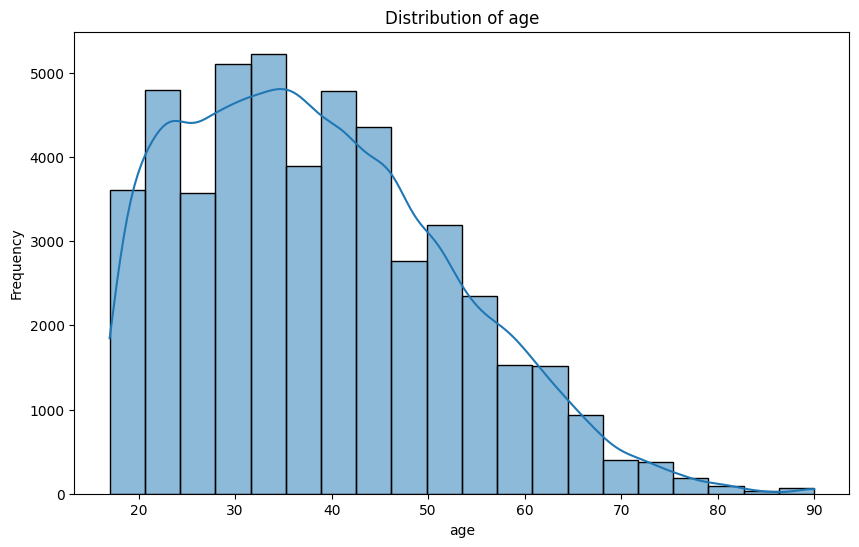

In [564]:
variable = 'age'
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df[variable], bins=20, kde=True, ax=ax)
ax.set_title(f'Distribution of {variable}')
ax.set_xlabel(variable)
ax.set_ylabel('Frequency')
plt.show()


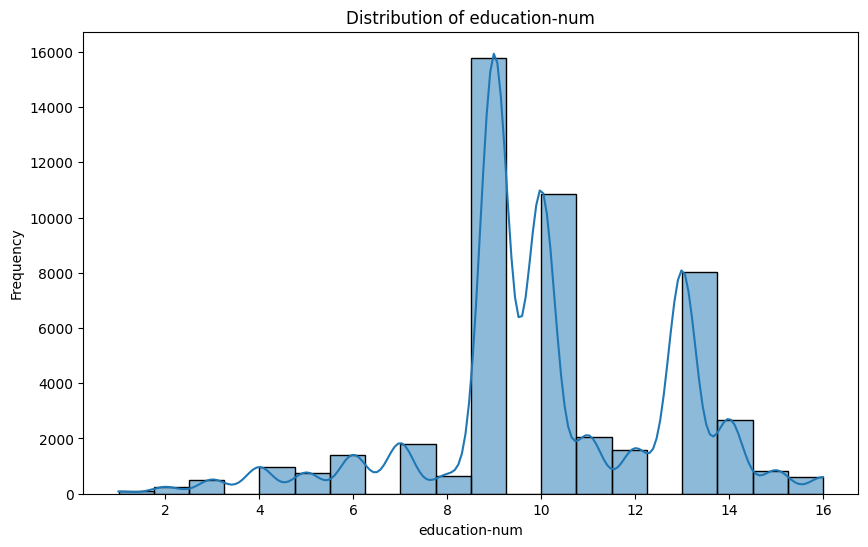

In [565]:
variable = 'education-num'
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df[variable], bins=20, kde=True, ax=ax)
ax.set_title(f'Distribution of {variable}')
ax.set_xlabel(variable)
ax.set_ylabel('Frequency')
plt.show()

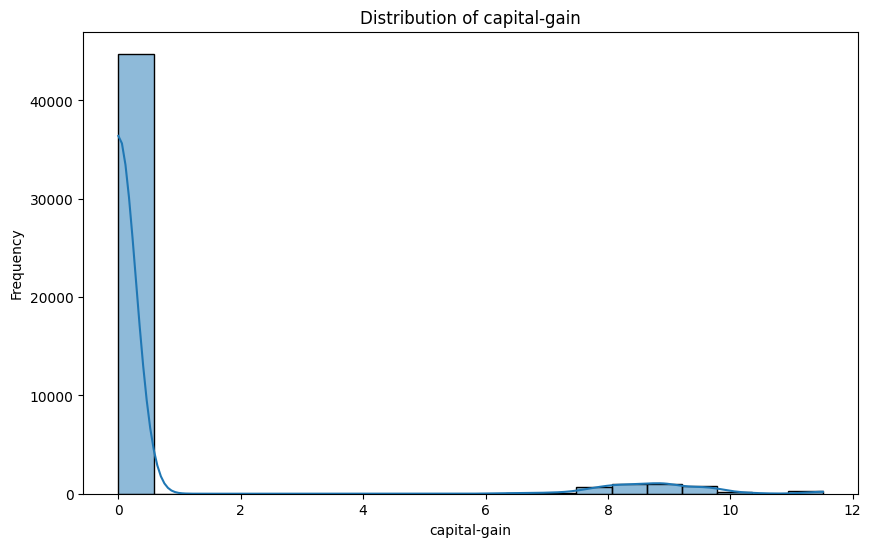

In [566]:
variable = 'capital-gain'
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df[variable], bins=20, kde=True, ax=ax)
ax.set_title(f'Distribution of {variable}')
ax.set_xlabel(variable)
ax.set_ylabel('Frequency')
plt.show()

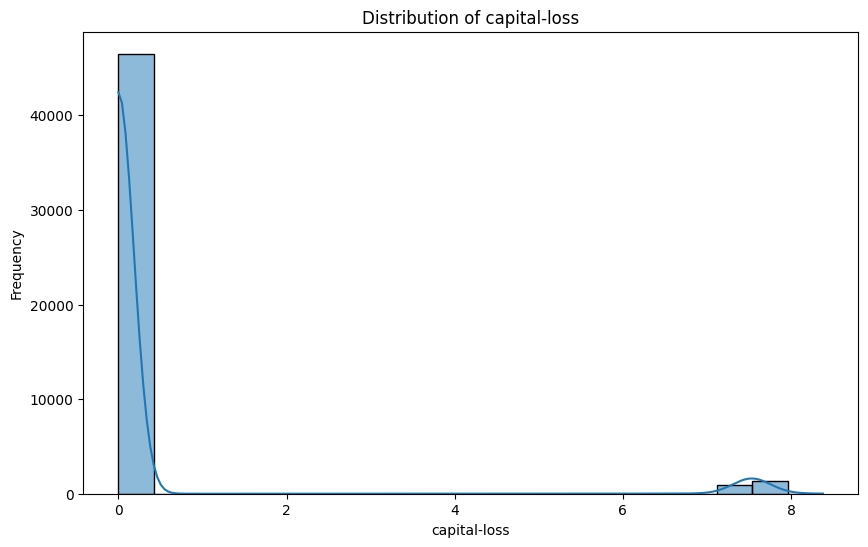

In [567]:
variable = 'capital-loss'
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df[variable], bins=20, kde=True, ax=ax)
ax.set_title(f'Distribution of {variable}')
ax.set_xlabel(variable)
ax.set_ylabel('Frequency')
plt.show()

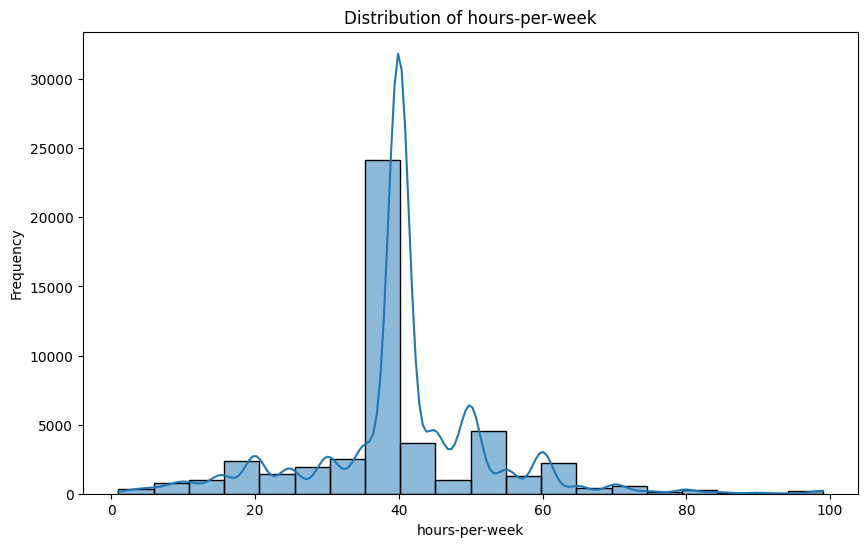

In [568]:
variable = 'hours-per-week'
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df[variable], bins=20, kde=True, ax=ax)
ax.set_title(f'Distribution of {variable}')
ax.set_xlabel(variable)
ax.set_ylabel('Frequency')
plt.show()

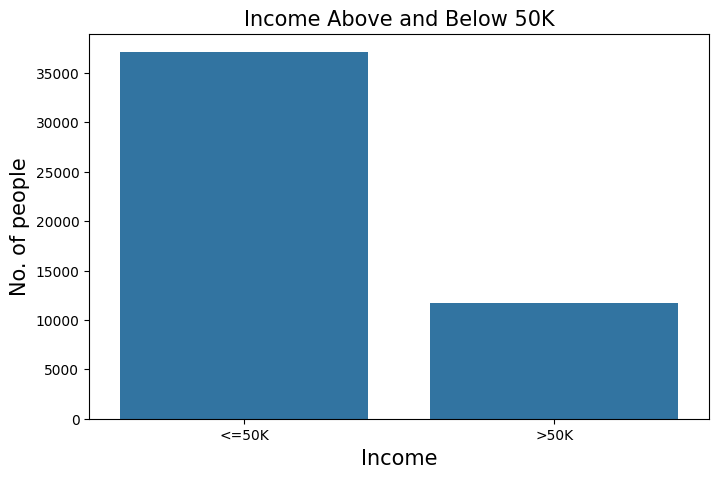

In [569]:
fig,axes = plt.subplots(1,1,figsize=(8,5))
sns.countplot(data = df, x='income')
plt.title('Income Above and Below 50K',fontsize=15)
plt.xlabel('Income',fontsize=15)
plt.ylabel('No. of people',fontsize=15)
plt.show()

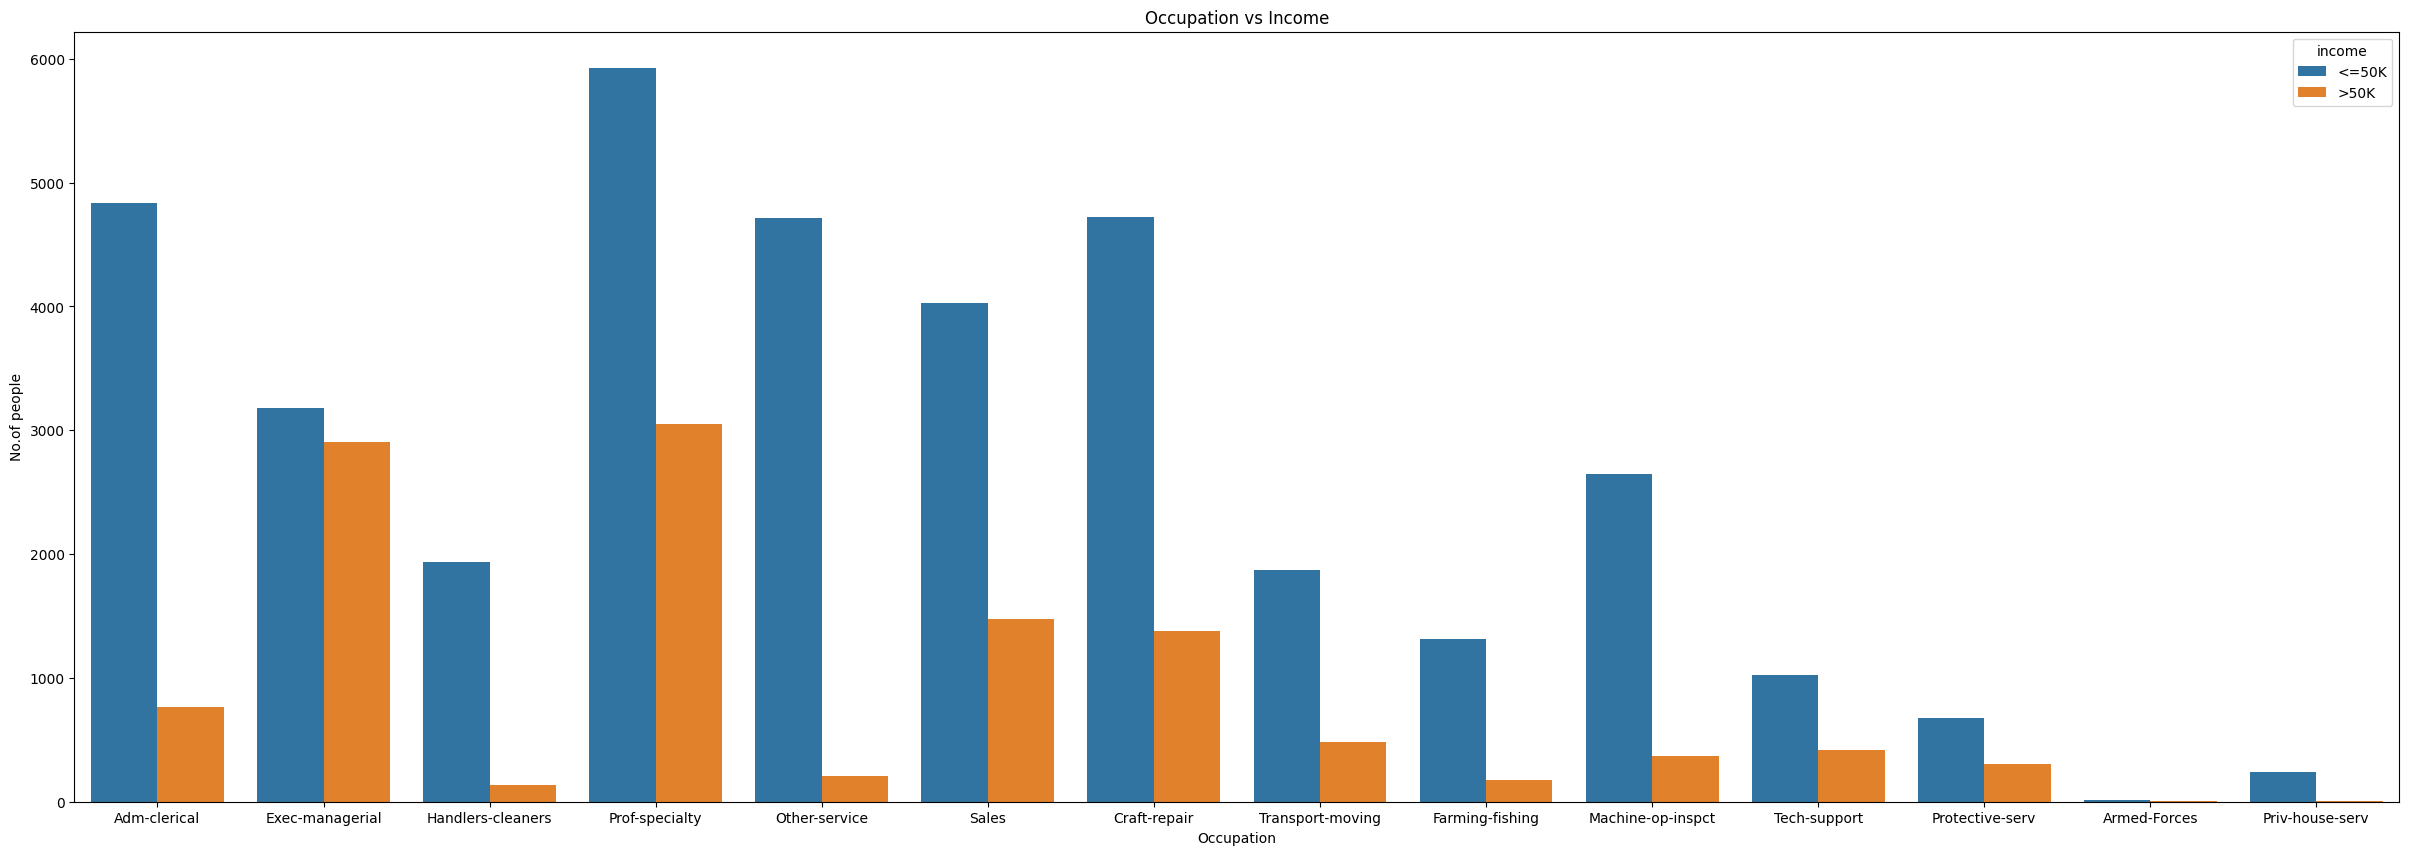

In [570]:
fig, axes = plt.subplots(1,1,figsize=(30,10))
sns.countplot(data=df,x='occupation',hue='income')
plt.title('Occupation vs Income')
plt.xlabel('Occupation')
plt.ylabel('No.of people')
plt.show()

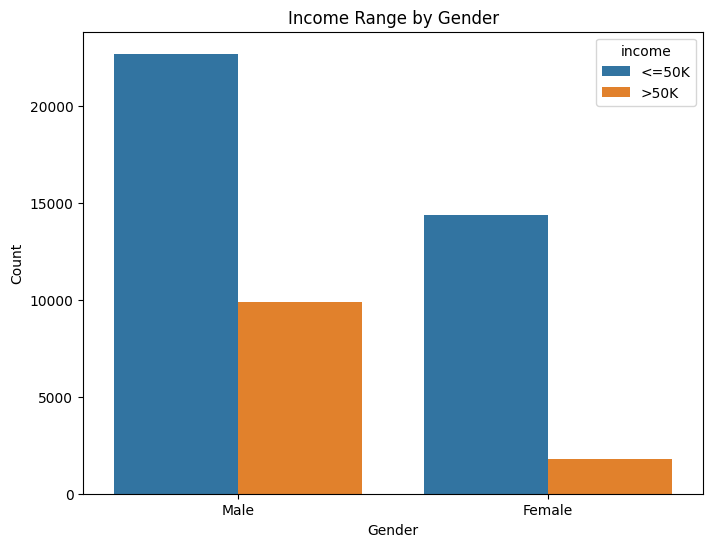

In [571]:
#True income >=50
#False income <=50
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sex', hue='income')
plt.title('Income Range by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

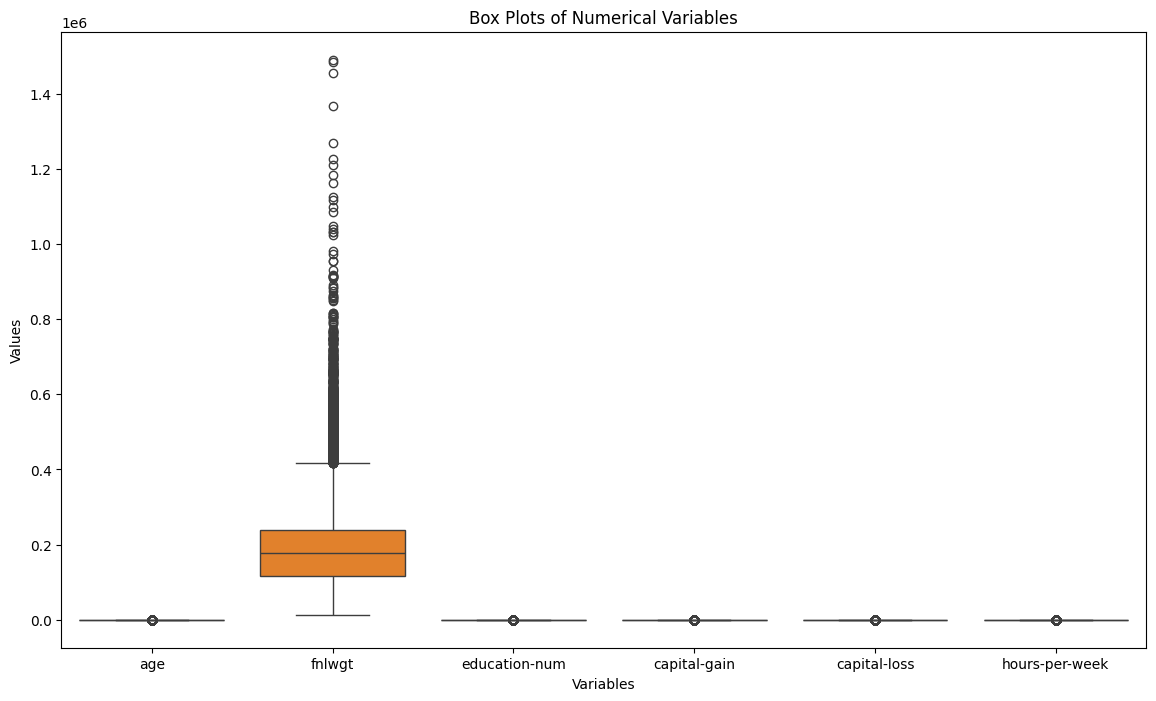

In [572]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_vars = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

plt.figure(figsize=(14, 8))
sns.boxplot(data=df[numerical_vars])
plt.title('Box Plots of Numerical Variables')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()

<ipython-input-573-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

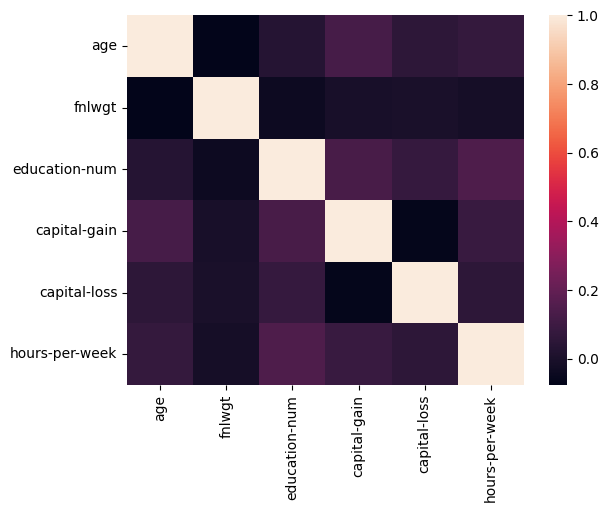

In [573]:
sns.heatmap(df.corr())

In [574]:
df.drop(columns=['fnlwgt'], inplace=True)


In [575]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,7.684784,0.0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,40,Cuba,<=50K


In [577]:
#Encode categorical variables by replacing the categorical values with numerical labels
new_label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    new_label_encoders[column] = LabelEncoder()
    df[column] = new_label_encoders[column].fit_transform(df[column])

df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,9,13,4,0,1,4,1,7.684784,0.0,40,38,0
1,50,5,9,13,2,3,0,4,1,0.000000,0.0,13,38,0
2,38,3,11,9,0,5,1,4,1,0.000000,0.0,40,38,0
3,53,3,1,7,2,5,0,2,1,0.000000,0.0,40,38,0
4,28,3,9,13,2,9,5,2,0,0.000000,0.0,40,4,0


In [578]:
X = df.drop(['income'], axis=1) #features
y = df['income'] #target variable

In [579]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [580]:
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the Gaussian Naive Bayes model
nb_classifier.fit(X_train, y_train)

# Predict classes on the testing dataset
y_pred_nb = nb_classifier.predict(X_test)

# Evaluate the Gaussian Naive Bayes model on the testing dataset
report_nb = classification_report(y_test, y_pred_nb)
print("Classification Report for Gaussian Naive Bayes on Testing Data:")
print(report_nb)

Classification Report for Gaussian Naive Bayes on Testing Data:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      7356
           1       0.61      0.56      0.58      2402

    accuracy                           0.80      9758
   macro avg       0.73      0.72      0.73      9758
weighted avg       0.80      0.80      0.80      9758



In [581]:
accuracy_test_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy (Naive Bayes): {:.4f}".format(accuracy_test_nb))


Accuracy (Naive Bayes): 0.8021


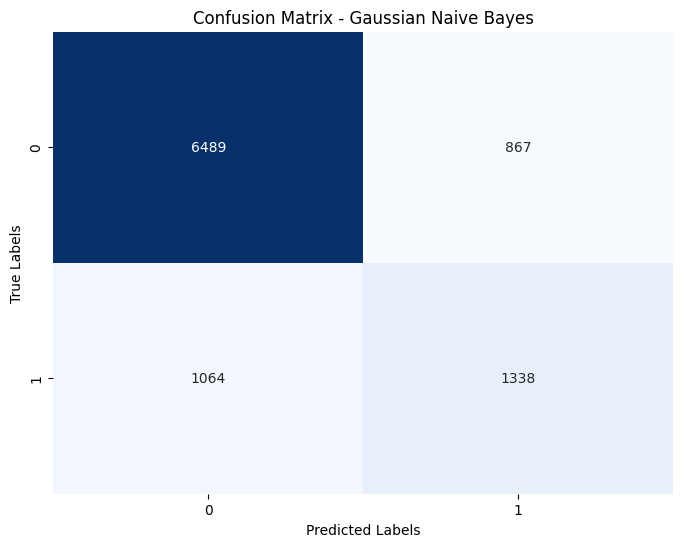

In [582]:
# Print the confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=nb_classifier.classes_, yticklabels=nb_classifier.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.show()

In [583]:
# Calculate and print testing accuracy with four decimal places
accuracy_test_nb = accuracy_score(y_test, y_pred_nb)
print("Testing Accuracy: {:.4f}".format(accuracy_test_nb))

# Calculate and print training accuracy with four decimal places
y_pred_train_nb = nb_classifier.predict(X_train)
accuracy_train_nb = accuracy_score(y_train, y_pred_train_nb)
print("Training Accuracy: {:.4f}".format(accuracy_train_nb))

Testing Accuracy: 0.8021
Training Accuracy: 0.8082


In [584]:
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest model
rf_classifier.fit(X_train, y_train)

# Predict classes on the testing dataset
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest model on the testing dataset
report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report for Random Forest on Testing Data:")
print(report_rf)

Classification Report for Random Forest on Testing Data:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7356
           1       0.72      0.62      0.67      2402

    accuracy                           0.85      9758
   macro avg       0.80      0.77      0.78      9758
weighted avg       0.84      0.85      0.84      9758



In [585]:
# Calculate and print testing accuracy for Random Forest with four decimal places
accuracy_test_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy (Random Forest): {:.4f}".format(accuracy_test_rf))

Accuracy (Random Forest): 0.8474


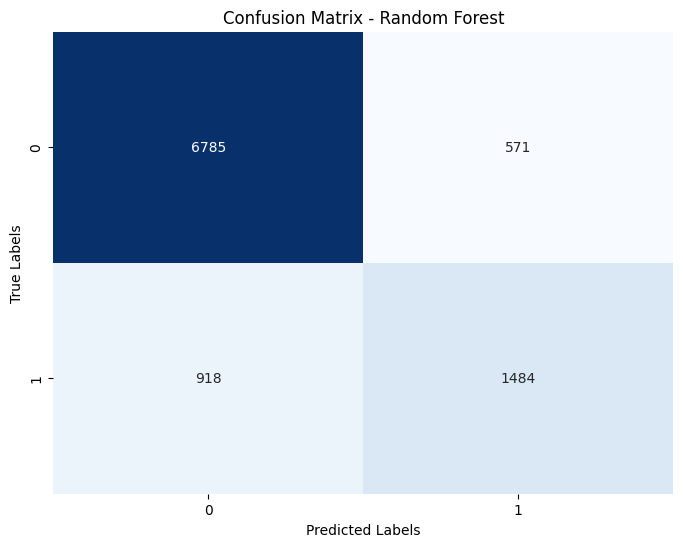

In [586]:
# Print the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=nb_classifier.classes_, yticklabels=nb_classifier.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [587]:
# Compare the models using accuracy
print("\nModel Comparison:")
print("Testing Accuracy (Random Forest): {:.4f}".format(accuracy_test_rf))
print("Testing Accuracy (Naive Bayes): {:.4f}".format(accuracy_test_nb))


Model Comparison:
Testing Accuracy (Random Forest): 0.8474
Testing Accuracy (Naive Bayes): 0.8021
